In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [3]:
df_index = pd.read_csv("data/economic_index.csv")

In [4]:
df_index.head()

Unnamed: 0  year  month  interest_rate  unemployment_rate  index_price
0           0  2017     12           2.75                5.3         1464
1           1  2017     11           2.50                5.3         1394
2           2  2017     10           2.50                5.3         1357
3           3  2017      9           2.50                5.3         1293
4           4  2017      8           2.50                5.4         1256

In [5]:
# dropping unneccessary columns
df_index.drop(columns = ["Unnamed: 0", "year", "month"], axis = 1, inplace = True)

In [6]:
df_index.head()

interest_rate  unemployment_rate  index_price
0           2.75                5.3         1464
1           2.50                5.3         1394
2           2.50                5.3         1357
3           2.50                5.3         1293
4           2.50                5.4         1256

In [7]:
# check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

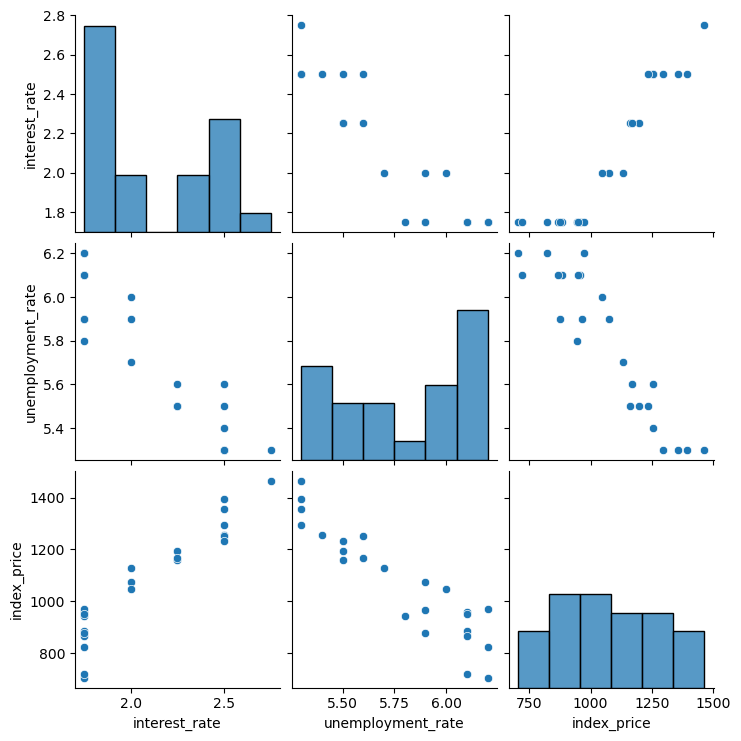

In [8]:
## some visualization
import seaborn as sns
sns.pairplot(df_index)

In [9]:
df_index.corr()

interest_rate  unemployment_rate  index_price
interest_rate           1.000000          -0.925814     0.935793
unemployment_rate      -0.925814           1.000000    -0.922338
index_price             0.935793          -0.922338     1.000000

Text(0, 0.5, 'unemployment rate')

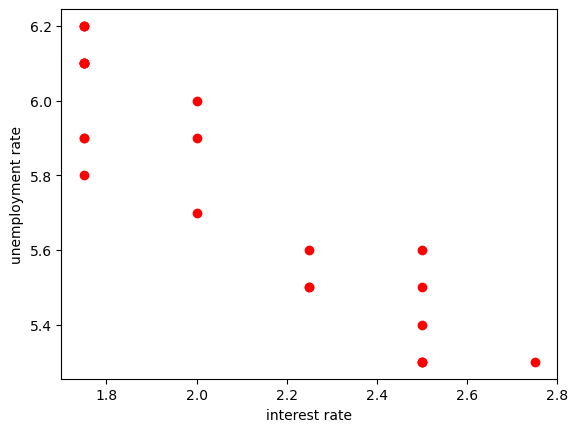

In [10]:
# visualizing the data more closly
plt.scatter(df_index["interest_rate"], df_index["unemployment_rate"], color = 'r')
plt.xlabel('interest rate')
plt.ylabel('unemployment rate')

In [11]:
# independent and dependent features
X = df_index.iloc[:,:-1]
Y = df_index.iloc[:,-1]

In [12]:
(X.head() ,Y.head())

(   interest_rate  unemployment_rate
 0           2.75                5.3
 1           2.50                5.3
 2           2.50                5.3
 3           2.50                5.3
 4           2.50                5.4,
 0    1464
 1    1394
 2    1357
 3    1293
 4    1256
 Name: index_price, dtype: int64)

In [13]:
# train test split
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [14]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

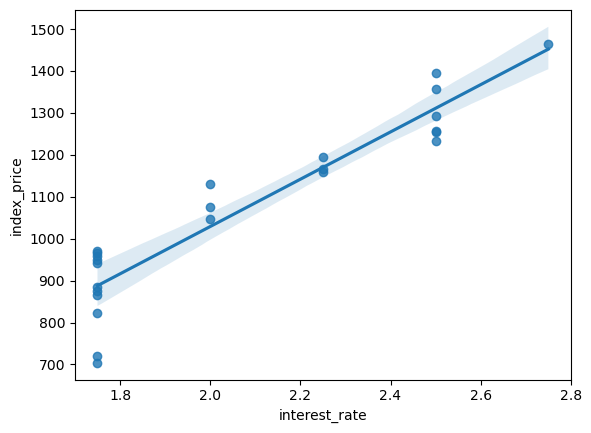

In [15]:
sns.regplot(x = df_index['interest_rate'], y = df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

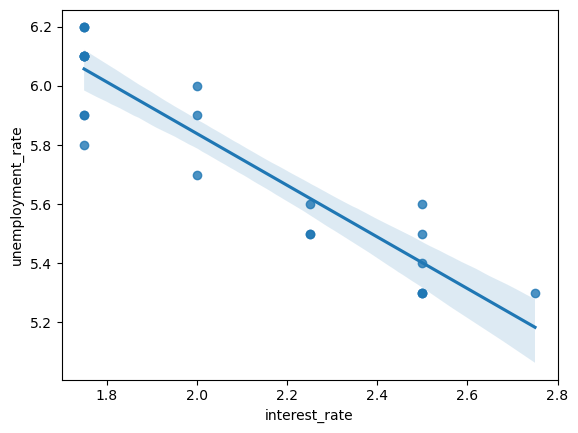

In [16]:
sns.regplot(x = df_index['interest_rate'], y = df_index['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

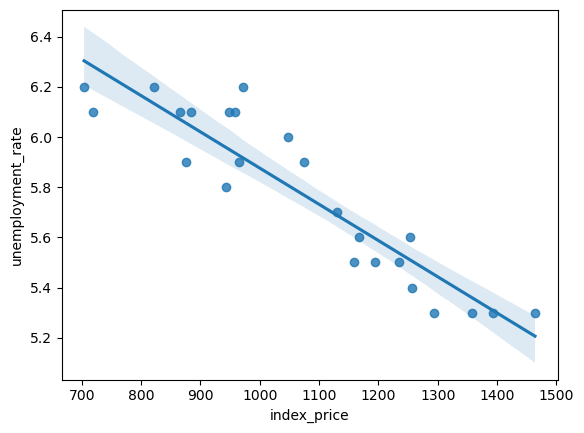

In [17]:
sns.regplot(x = df_index['index_price'], y = df_index['unemployment_rate'])

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_Train = scaler.fit_transform(X_Train)
X_Test = scaler.transform(X_Test)

In [20]:
X_Train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [21]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [22]:
regression.fit(X_Train,Y_Train)

LinearRegression()

In [23]:
# cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_Train, Y_Train, scoring = 'neg_mean_squared_error', cv = 3)

In [24]:
np.mean(validation_score)

-5914.828180162388

In [25]:
## prediction
Y_pred = regression.predict(X_Test)

In [26]:
Y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [27]:
## Performance Metric
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(Y_Test,Y_pred)
mae = mean_absolute_error(Y_Test,Y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712579
59.935781523235526
76.11677139574812


In [28]:
from sklearn.metrics import r2_score
r2score = r2_score(Y_Test,Y_pred)
print(r2score)

0.8278978091457142


In [30]:
#Display the adjusted R-Squared
print(
    1 - (1 - r2score) * (len(Y_Test) - 1) / (len(Y_Test) - X_Test.shape[1] - 1)
)

0.713163015242857


## Assumptions

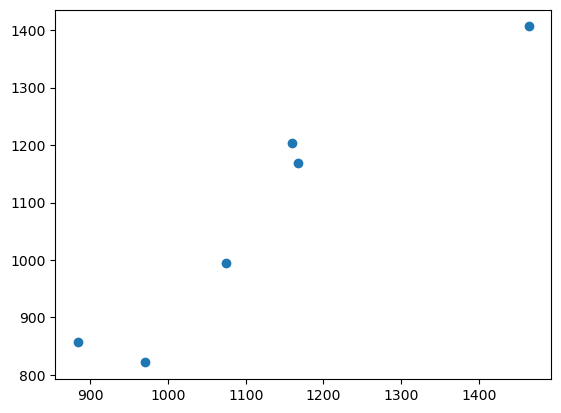

In [31]:
plt.scatter(Y_Test, Y_pred)

In [32]:
residuals = Y_Test - Y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


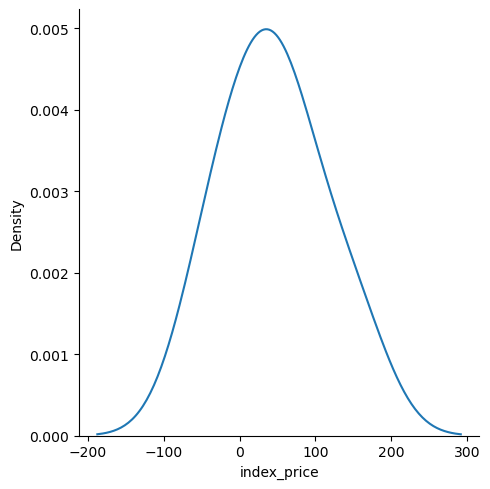

In [33]:
## plot this residuals
sns.displot(residuals, kind='kde')

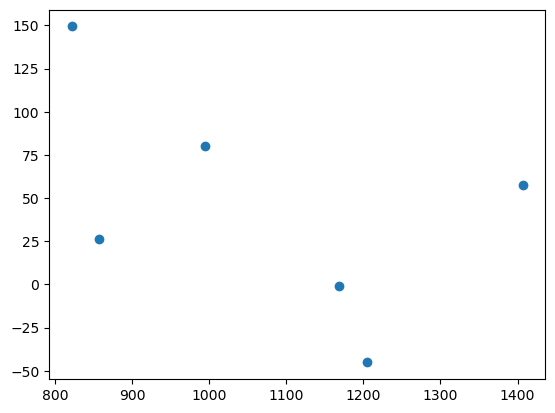

In [34]:
## scatter plot with residuals and 
plt.scatter(Y_pred, residuals)

In [35]:
## OLS linear rregression
import statsmodels.api as sm
model = sm.OLS(Y_Train, X_Train).fit()

In [36]:
model.summary()

C:\Users\433de\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 16 Jul 2025   Prob (F-statistic):                       0.754
Time:                        18:01:05   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
print(regression.coef_)

[  88.27275507 -116.25716066]
